#Import TensorFLow

In [13]:
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)
print("Using tensorflow version", tf.__version__)

Using tensorflow version 2.0.0


#Import DataSet

In [15]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 189s 16us/step


 #Check the size 

In [22]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_trest", y_test.shape)

#here the 28,28 means the width and the height of the data

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_trest (10000,)


#Plot Images Examples


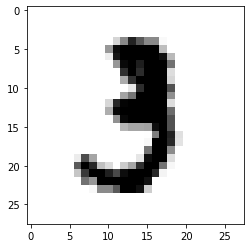

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline 

#cmap to make for binary (black and white)
plt.imshow(x_train[10], cmap='binary')
plt.show()

#display the lables

In [23]:
y_train[10]

3

#check the y labales. python set 

In [36]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


#One Hot Encoding 
this is to covert every label into list of 10 elements, it let the relavalt lable as one and other element of the list as 0 

5 = [0,0,0,0,1,0,0,0,0,0]

7 = [0,0,0,0,0,0,1,0,0,0]

In [38]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

#validate using the shape

In [39]:
print("y_train_encoded: ",y_train_encoded.shape)
print("y_test_encoded: ", y_test_encoded.shape)

y_train_encoded:  (60000, 10)
y_test_encoded:  (10000, 10)


#Dispaly Encodede Labales 

In [41]:
y_train_encoded[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# preprocessing 

#Uncrolling N-dimensional Arrays to Vectors 

In [43]:
import numpy as np
x_train_reshape = np.reshape(x_train,(60000,784))
x_test_reshape = np.reshape(x_test, (10000,784))

print("x_train_reshape: ", x_train_reshape.shape)
print("x_test_reshape: ", x_test_reshape.shape)

x_train_reshape:  (60000, 784)
x_test_reshape:  (10000, 784)


#Display pixel values

Below displays the set of pixel values the image 1 

In [45]:
print(set(x_train_reshape[1]))

{0, 6, 7, 10, 12, 19, 21, 25, 28, 29, 37, 38, 47, 48, 50, 51, 54, 56, 57, 60, 63, 71, 75, 76, 79, 84, 85, 86, 96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145, 146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189, 190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228, 229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255}


#Data Normalization (to perform the processing efficently) 

we use epsilon to reduce the effect of having small std vaule

here we have used same x_mean and the x_std for the both x_test_reshape and the x_test_reshape data sets, reseon is we need to do same preprocessing for both data sets, trying to normalized the x_tesrt 

In [ ]:
x_mean = np.mean(x_train_reshape)
x_std= np.std(x_train_reshape)

epsilon = 1e-10

x_train_norm = (x_train_reshape - x_mean) / (x_std +epsilon)
x_test_norm = (x_test_reshape - x_mean ) / (x_std + epsilon)